In [235]:
# Dependencies and Setup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f_oneway

In [236]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv('Mouse_metadata.csv')
study_results = pd.read_csv('Study_results.csv')

In [237]:
# Combine the data into a single DataFrame
single_df = pd.merge(study_results,mouse_metadata, how="left", on = ("Mouse ID"))

In [238]:
# Display the data table for preview
single_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [239]:
# Checking the number of mice.
mice = np.unique(single_df['Mouse ID'])
total_mice = len(mice)
print(total_mice)

249


In [240]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = single_df.loc[single_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [241]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_micedf = single_df.loc[single_df["Mouse ID"] == "g989", :]
dup_micedf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [242]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_micedf = single_df[single_df["Mouse ID"].isin(dup_mice) == False]
clean_micedf.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [243]:
# Checking the number of mice in the clean DataFrame.
num_clean_micedf = clean_micedf["Mouse ID"].nunique()
num_clean_micedf

248

SUMMARY STATISTICS

In [244]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_micedf['Tumor Volume (mm3)'].groupby(clean_micedf['Drug Regimen']).mean()
median = clean_micedf['Tumor Volume (mm3)'].groupby(clean_micedf['Drug Regimen']).median()
var = clean_micedf['Tumor Volume (mm3)'].groupby(clean_micedf['Drug Regimen']).var()
std = clean_micedf['Tumor Volume (mm3)'].groupby(clean_micedf['Drug Regimen']).std()
sem = clean_micedf['Tumor Volume (mm3)'].groupby(clean_micedf['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Var.":var, 
                           "Tumor Volume STDEV":std, 
                           "Tumor Volume St. Err.":sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Var.,Tumor Volume STDEV,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [245]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summ = clean_micedf.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summ

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

BAR AND PIE CHARTS

In [246]:
# Generate a bar plot showinug the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate the plot
reg_count = clean_micedf["Drug Regimen"].value_counts()
reg_count 

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

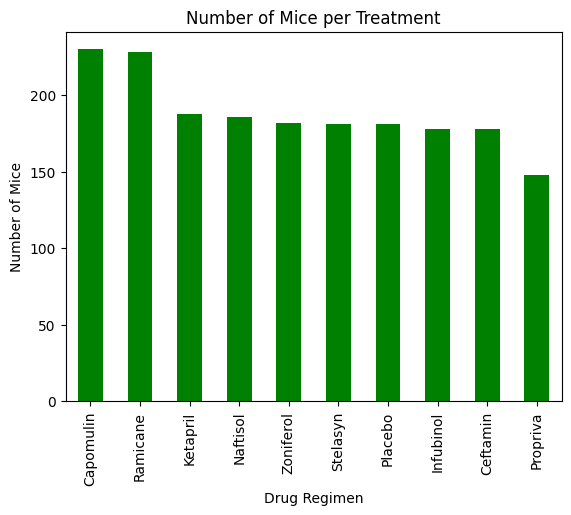

In [247]:
bar_plot_pandas = reg_count.plot.bar(color='g')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


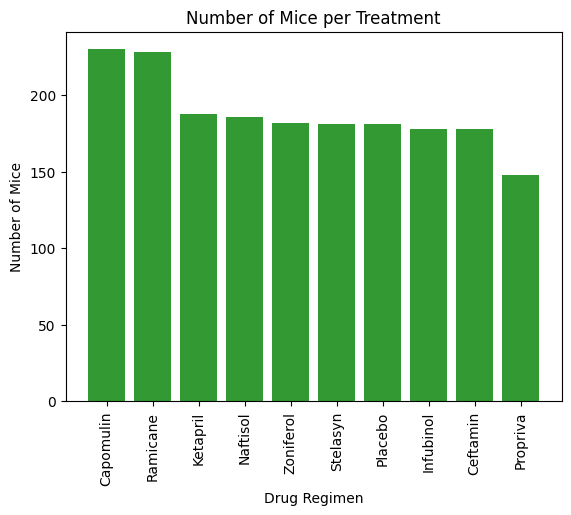

In [248]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = reg_count.index.values
y_axis = reg_count.values
plt.bar(x_axis, y_axis, color='g', alpha=0.8, align='center')
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

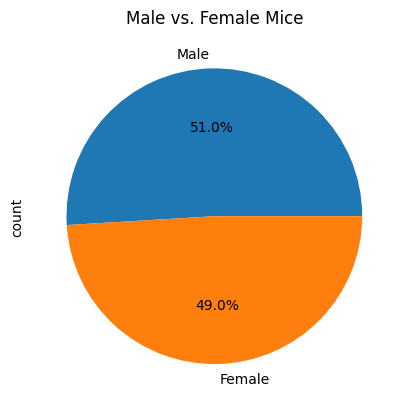

In [249]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malefemale_mice = clean_micedf["Sex"].value_counts()
plt.title("Male vs. Female Mice")
malefemale_mice.plot.pie(autopct= "%1.1f%%")
plt.show()

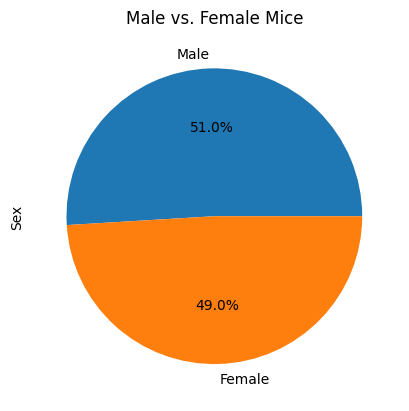

In [250]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = malefemale_mice.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs. Female Mice')
plt.ylabel('Sex')
plt.show()

QUARTILES, OUTLIERS & BOXPLOTS

In [251]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_ftv = clean_micedf.loc[clean_micedf["Drug Regimen"] == "Capomulin",:]
ramicane_ftv = clean_micedf.loc[clean_micedf["Drug Regimen"] == "Ramicane", :]
infubinol_ftv = clean_micedf.loc[clean_micedf["Drug Regimen"] == "Infubinol", :]
ceftamin_ftv = clean_micedf.loc[clean_micedf["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = clean_micedf.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
mergeddf_time = last_timepoint.merge(clean_micedf, on = ["Mouse ID", "Timepoint"], how = "left")
mergeddf_time

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [252]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    vol = mergeddf_time.loc[mergeddf_time["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_vol.append(vol)
    quartile = vol.quantile([0.25,0.5,0.75])
    lower_q = quartile[0.25]
    upper_q = quartile[0.75]
    iqr = upper_q - lower_q
    lower_bound = round(lower_q - (1.5*iqr),2)
    upper_bound = round(upper_q + (1.5*iqr),2)
    outliers = vol.loc[(vol<lower_bound)|(vol>upper_bound)]
    print(f"{drug} {outliers}")

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


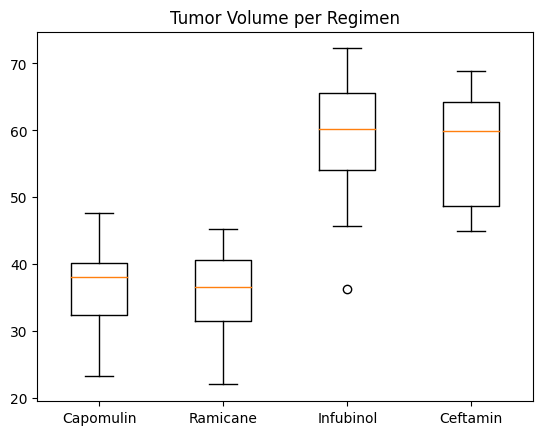

In [253]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,labels=treatments)
plt.title('Tumor Volume per Regimen')
plt.show()

LINE AND SCATTER PLOTS

Text(0, 0.5, 'Tumor Volume (mm3)')

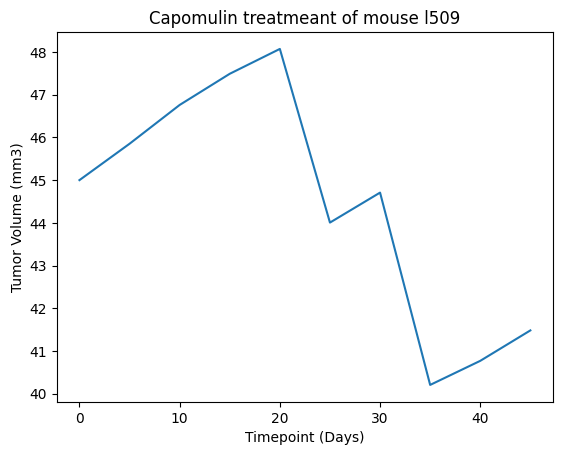

In [254]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = capomulin_ftv.loc[capomulin_ftv["Mouse ID"] == "l509",:]
line_plot.head()
x_axis = line_plot["Timepoint"]
tum_vol = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tum_vol, label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

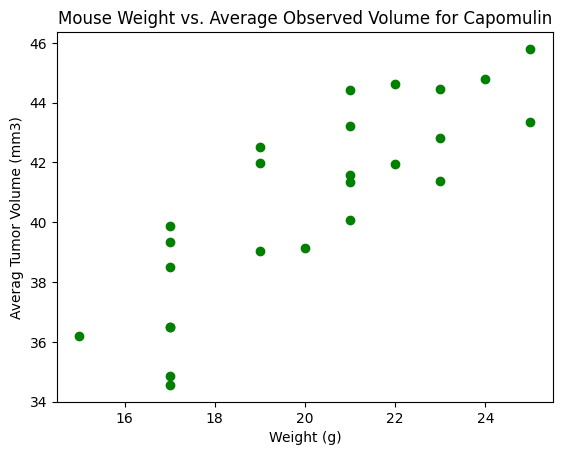

In [255]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
entire_cap = clean_micedf.loc[clean_micedf["Drug Regimen"] == "Capomulin"]
scatter_plot = entire_cap.groupby(["Mouse ID"])[["Tumor Volume (mm3)" , "Weight (g)"]].mean()
fig1, ax1 = plt.subplots()
marker_size=10
plt.scatter(scatter_plot['Weight (g)'],scatter_plot['Tumor Volume (mm3)'], color="green")
plt.title('Mouse Weight vs. Average Observed Volume for Capomulin')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')

CORRELATION AND REGRESSION

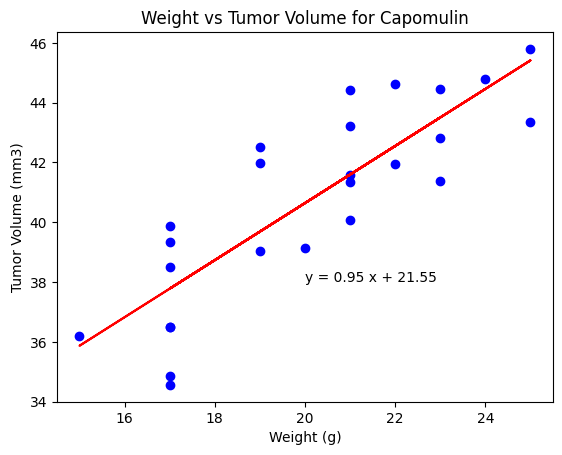

In [256]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
coefficient = st.pearsonr(scatter_plot['Weight (g)'],scatter_plot['Tumor Volume (mm3)'])
coefficient

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"])
regress_values=scatter_plot["Weight (g)"]* slope + intercept
line = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"],color='b')
plt.plot(scatter_plot["Weight (g)"], regress_values, color='red')
plt.annotate(line,(20,38), fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()